# Anomaly data generation
The first step of this project is actuallly to generate the wind turbine data. <br>
I will use a very useful python library called PyOD, which allow us, among other thing to generate synthetic data for anomaly detection experimentations.
<br>
This notebook focus on the generation of the training data for the anomaly detection model.

In [1]:
# uncomment if necessary
#!pip install -U pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 845.4 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185329 sha256=47ba5858d65a8de636a68dadef37205a46f41dd11f26fff8229f2ff9a69d859e
  Stored in directory: /home/jupyter/.cache/pip/wheels/36/8e/e2/e932956b10b843eb6be9eefa70b5c1bee7b561be14c423b136
Successfully built pyod


In [38]:
from pyod.utils.data import generate_data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from datetime import datetime

### The 'generate_data' function lets us specify:
 - the number of data points in the train and test set
 - the number of features in our dataset.
     Since in our problem "it has become clear that temperature, humidity, and sound volume are good indicators for an anomaly in the production cycle" I will generate a dataset wih 3 features.
 - The percentage of Outliers/Anomaly points is controlled by the contamination parameter. I will set it to 5%.

In [2]:
X_train, X_test, y_train, y_test = generate_data(n_train=10**5, n_test=2*10**4, n_features=3, contamination=0.05, random_state=42)

In [3]:
from xgboost import XGBClassifier

In [4]:
params = {
    'objective': 'binary:logistic',
    'n_jobs': -1,
    'random_state': 42,
    'scale_pos_weight': (y_train == 0).sum() / (y_train == 1).sum()
}

xgb = XGBClassifier(**params)

In [5]:
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric=['logloss', 'auc'])

[0]	validation_0-logloss:0.44115	validation_0-auc:0.99849
[1]	validation_0-logloss:0.30139	validation_0-auc:0.99887
[2]	validation_0-logloss:0.21342	validation_0-auc:0.99878
[3]	validation_0-logloss:0.15431	validation_0-auc:0.99876
[4]	validation_0-logloss:0.11351	validation_0-auc:0.99873
[5]	validation_0-logloss:0.08476	validation_0-auc:0.99875
[6]	validation_0-logloss:0.06406	validation_0-auc:0.99878
[7]	validation_0-logloss:0.04915	validation_0-auc:0.99925
[8]	validation_0-logloss:0.03820	validation_0-auc:0.99923
[9]	validation_0-logloss:0.03014	validation_0-auc:0.99950
[10]	validation_0-logloss:0.02426	validation_0-auc:0.99948
[11]	validation_0-logloss:0.02009	validation_0-auc:0.99961
[12]	validation_0-logloss:0.01694	validation_0-auc:0.99978
[13]	validation_0-logloss:0.01454	validation_0-auc:0.99983
[14]	validation_0-logloss:0.01272	validation_0-auc:0.99982
[15]	validation_0-logloss:0.01126	validation_0-auc:0.99982
[16]	validation_0-logloss:0.01015	validation_0-auc:0.99983
[17]	va

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-logloss:0.00604	validation_0-auc:0.99983
[37]	validation_0-logloss:0.00600	validation_0-auc:0.99983
[38]	validation_0-logloss:0.00601	validation_0-auc:0.99982
[39]	validation_0-logloss:0.00582	validation_0-auc:0.99983
[40]	validation_0-logloss:0.00577	validation_0-auc:0.99983
[41]	validation_0-logloss:0.00566	validation_0-auc:0.99983
[42]	validation_0-logloss:0.00554	validation_0-auc:0.99983
[43]	validation_0-logloss:0.00546	validation_0-auc:0.99983
[44]	validation_0-logloss:0.00546	validation_0-auc:0.99982
[45]	validation_0-logloss:0.00543	validation_0-auc:0.99982
[46]	validation_0-logloss:0.00537	validation_0-auc:0.99982
[47]	validation_0-logloss:0.00533	validation_0-auc:0.99983
[48]	validation_0-logloss:0.00529	validation_0-auc:0.99983
[49]	validation_0-logloss:0.00520	validation_0-auc:0.99982
[50]	validation_0-logloss:0.00517	validation_0-auc:0.99983
[51]	validation_0-logloss:0.00515	validation_0-auc:0.99983
[52]	validation_0-logloss:0.00502	validation_0-auc:0.999

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [6]:
y_pred = xgb.predict(X_test)

In [7]:
# evaluation metrics
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print(f'Classification Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 0.9989
Confusion Matrix:
 [[18987    13]
 [    9   991]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19000
         1.0       0.99      0.99      0.99      1000

    accuracy                           1.00     20000
   macro avg       0.99      1.00      0.99     20000
weighted avg       1.00      1.00      1.00     20000



### Saving the model for deploying it later

In [8]:
xgb.save_model("model.bst")

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:49:56] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


# Model Deploymnet

In [10]:
# Setting up necessary variables
GCP_PROJECT = 'abi-martech-global-dev'
MODEL_BUCKET = 'gs://abi-martech-saz-dev/anomaly_detection_v2/'
VERSION_NAME = 'v2'
MODEL_NAME = 'xgb_anomaly_detector'
REGION = 'us-central1'
INPUT_DATA_FILE = 'predictions.json'

copying model to Google Cloud Storage bucket

In [13]:
!gsutil cp model.bst $MODEL_BUCKET

Copying file://model.bst [Content-Type=application/octet-stream]...
/ [1 files][153.8 KiB/153.8 KiB]                                                
Operation completed over 1 objects/153.8 KiB.                                    


# Now let's create the model within google cloud platform

### It is necessary to enable ai-platform API so we can deploy the model. The easiest way is going to the GCP console and enabling it.
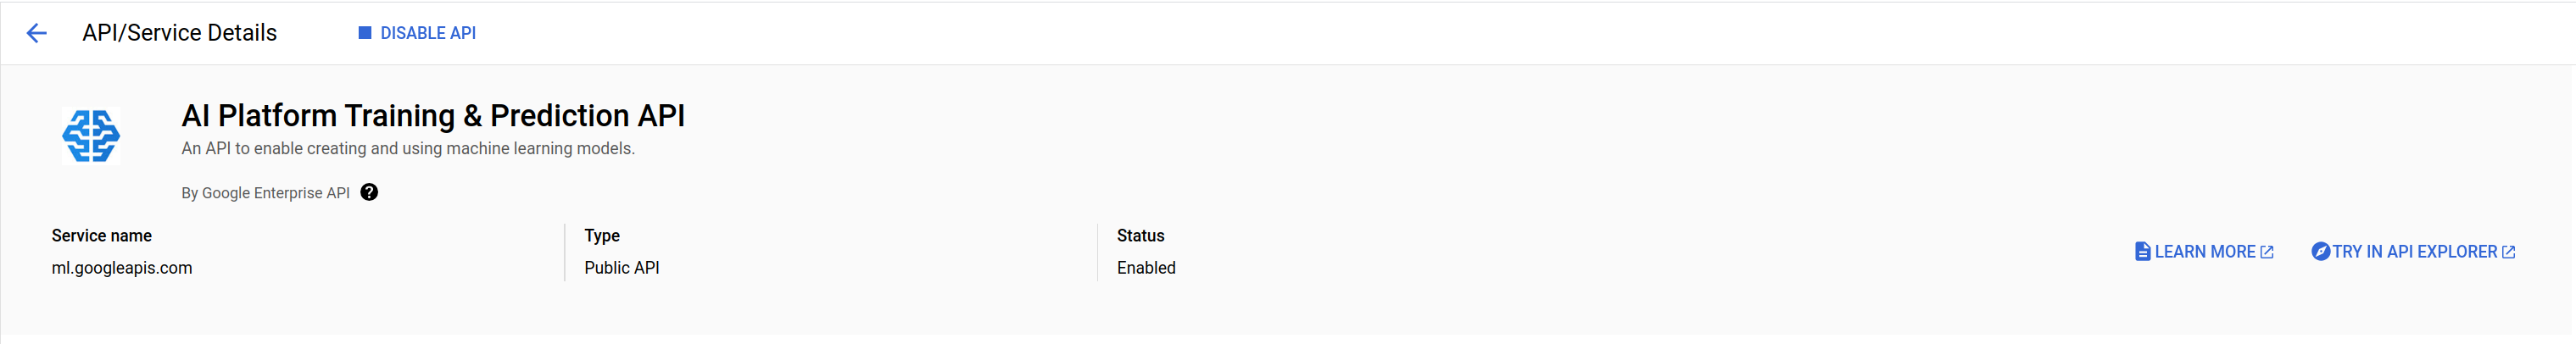

In [16]:
!gcloud ai-platform models create $MODEL_NAME \
--region=$REGION

Using endpoint [https://us-central1-ml.googleapis.com/]
Created ai platform model [projects/abi-martech-global-dev/models/xgb_anomaly_detector].


Now it's time to deploy the model. We can do that with this gcloud command:

In [14]:
!gcloud ai-platform versions create $VERSION_NAME \
--model=$MODEL_NAME \
--framework='XGBOOST' \
--runtime-version=2.11 \
--origin=$MODEL_BUCKET \
--python-version=3.7 \
--project=$GCP_PROJECT \
--region=$REGION

Using endpoint [https://us-central1-ml.googleapis.com/]
Creating version (this might take a few minutes)......done.                    


### after the model is deployed, we should see the model in the "Models" section of AI platform 

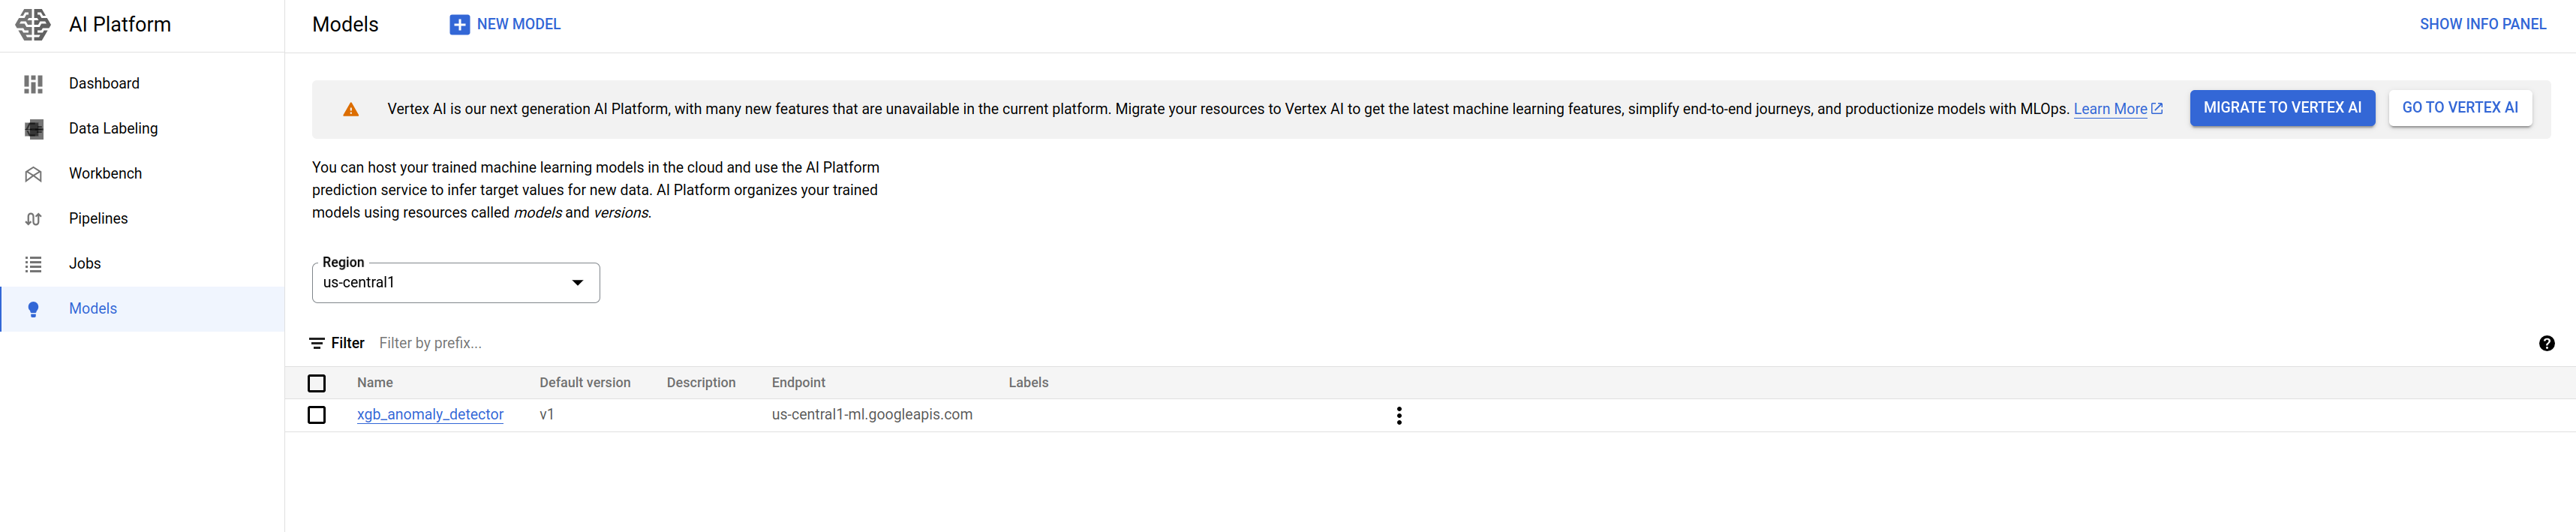

# Testing endpoint
Now that our model is deployed, it is time to submit requests to it.<br>
GCP let us send POST requests to the endpoint with the help of the "gcloud ml-engine predict" command line tool.<br>
but first we need to write our prediction data to a json file:

In [15]:
X_test[:10]

array([[4.90192309, 5.72504681, 6.59729939],
       [4.95559998, 7.11469792, 6.43817989],
       [5.61448583, 5.12700372, 6.34225026],
       [5.80974135, 6.39482236, 5.06047735],
       [6.2910577 , 6.32723929, 5.92005006],
       [5.12661859, 5.43665661, 6.40542648],
       [5.54766533, 6.64908306, 6.3972517 ],
       [5.51726988, 7.33751196, 6.32609274],
       [6.58576598, 5.48733213, 7.61274622],
       [5.16204383, 5.03632857, 6.76039964]])

In [16]:
%%writefile predictions.json
[4.90192309, 5.72504681, 6.59729939]
[4.95559998, 7.11469792, 6.43817989]
[5.61448583, 5.12700372, 6.34225026]
[5.80974135, 6.39482236, 5.06047735]
[6.2910577 , 6.32723929, 5.92005006]
[5.12661859, 5.43665661, 6.40542648]
[5.54766533, 6.64908306, 6.3972517 ]
[5.51726988, 7.33751196, 6.32609274]
[6.58576598, 5.48733213, 7.61274622]
[5.16204383, 5.03632857, 6.76039964]

Overwriting predictions.json


In [17]:
response = !gcloud ai-platform predict --model $MODEL_NAME \
--version $VERSION_NAME \
--json-instances $INPUT_DATA_FILE \
--region $REGION

In [21]:
predicted_labels = ['anomaly' if el >= 0.5 else 'normal' for el in eval(response[1])]
predicted_labels

['normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal']

# Simulating Data Stream

Now let's simulate a data stream from the with the static data we generated with PyOD.<br>
Every second I will send a request to the endpoint. We can monitor the endpoint's metric in the GCP console

In [27]:
# generate the list of indices to be sampled
sample_indices = list(range(X_test.shape[0]))

In [42]:
while True:
    # sample some data
    idx = np.random.choice(sample_indices)
    # write predictions to the input file 
    with open('predictions.json', 'w') as f:
        f.write(json.dumps(X_test[idx].tolist()))
    # query the endpoint
    response = !gcloud ai-platform predict --model $MODEL_NAME --version $VERSION_NAME --json-instances $INPUT_DATA_FILE --region $REGION
    status = 'ANOMALOUS' if eval(response[1])[0] > 0.5 else 'NORMAL'
    timestamp = datetime.now()
    print(f"{timestamp} -- Wind turbine status: {status}")

2023-10-23 17:09:10.272397 -- Wind turbine status: NORMAL
2023-10-23 17:09:10.983912 -- Wind turbine status: NORMAL
2023-10-23 17:09:11.671686 -- Wind turbine status: NORMAL
2023-10-23 17:09:12.321600 -- Wind turbine status: NORMAL
2023-10-23 17:09:13.010725 -- Wind turbine status: NORMAL
2023-10-23 17:09:13.660994 -- Wind turbine status: NORMAL
2023-10-23 17:09:14.327027 -- Wind turbine status: ANOMALOUS
2023-10-23 17:09:14.984145 -- Wind turbine status: NORMAL
2023-10-23 17:09:15.655451 -- Wind turbine status: ANOMALOUS
2023-10-23 17:09:16.302893 -- Wind turbine status: NORMAL
2023-10-23 17:09:16.939241 -- Wind turbine status: ANOMALOUS
2023-10-23 17:09:17.583905 -- Wind turbine status: NORMAL
2023-10-23 17:09:18.232957 -- Wind turbine status: NORMAL
2023-10-23 17:09:18.891914 -- Wind turbine status: NORMAL
2023-10-23 17:09:19.545254 -- Wind turbine status: NORMAL
2023-10-23 17:09:20.187337 -- Wind turbine status: NORMAL
2023-10-23 17:09:20.850729 -- Wind turbine status: NORMAL
2023-

IndexError: list index out of range